## Wine Quality Prediction Using Machine Learning(Python)

## Attribute Information:

### Input variables (based on physicochemical tests):
#### 1 - fixed acidity
#### 2 - volatile acidity
#### 3 - citric acid
#### 4 - residual sugar
#### 5 - chlorides
#### 6 - free sulfur dioxide
#### 7 - total sulfur dioxide
#### 8 - density
#### 9 - pH
#### 10 - sulphates
#### 11 - alcohol

### Output variable (based on sensory data):
#### 12 - quality (score between 0 and 10)

### Import Libraries

In [1]:
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

### Import Data 

In [2]:
wine_data = pd.read_csv('winequality.csv')
wine_data

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
wine_data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
wine_data.tail()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
6496,red,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


### Data Understanding

In [5]:
wine_data.shape

(6497, 13)

In [6]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [7]:
wine_data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,6487.0,7.216579,1.296750,3.80000,6.40000,7.00000,7.70000,15.90000
volatile acidity,6489.0,0.339691,0.164649,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,6494.0,0.318722,0.145265,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,6495.0,5.444326,4.758125,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6495.0,0.056042,0.035036,0.00900,0.03800,0.04700,0.06500,0.61100
free sulfur dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total sulfur dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6488.0,3.218395,0.160748,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6493.0,0.531215,0.148814,0.22000,0.43000,0.51000,0.60000,2.00000


In [8]:
wine_data.nunique()

type                      2
fixed acidity           106
volatile acidity        187
citric acid              89
residual sugar          316
chlorides               214
free sulfur dioxide     135
total sulfur dioxide    276
density                 998
pH                      108
sulphates               111
alcohol                 111
quality                   7
dtype: int64

In [9]:
wine_data['type'].unique()

array(['white', 'red'], dtype=object)

In [10]:
wine_data['quality'].unique()

array([6, 5, 7, 8, 4, 3, 9], dtype=int64)

In [11]:
wine_data['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

### Data Visualization 

### Lets check the distribution of Data:

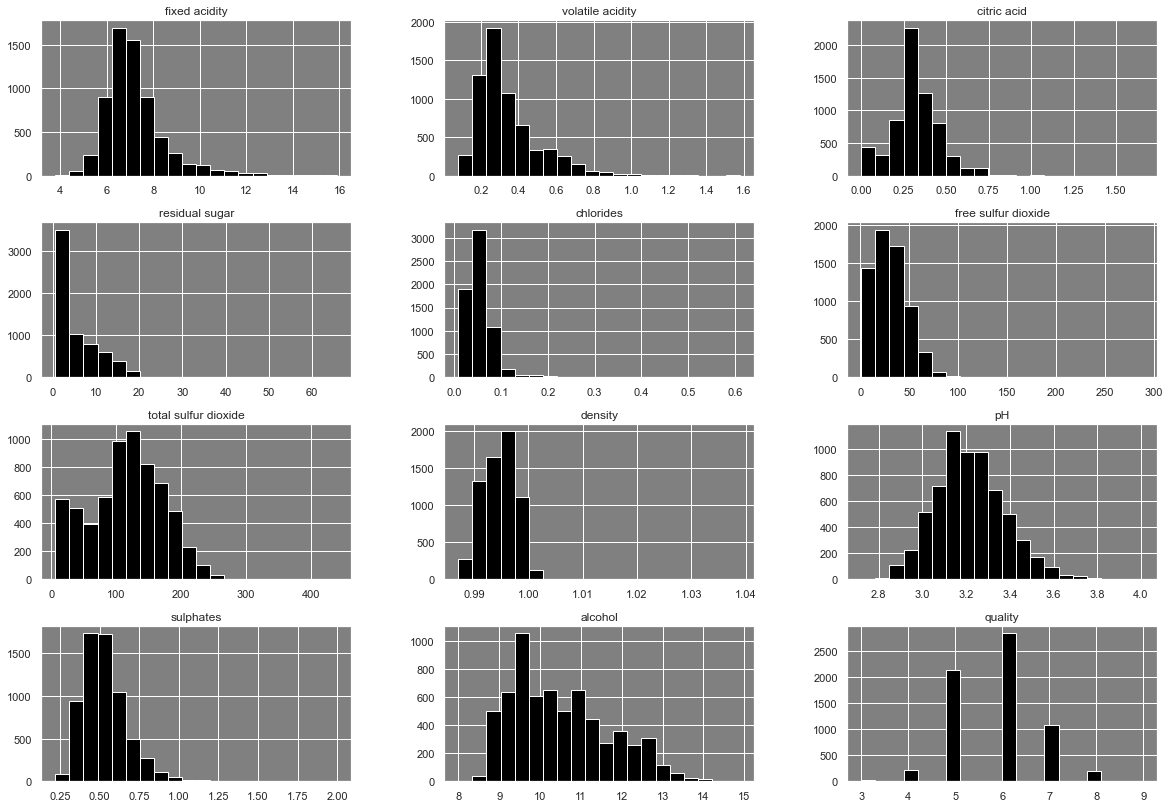

In [12]:
sns.set(rc={'axes.facecolor':'grey'})
wine_data.hist(bins=20,figsize=(20,14),color='black')
plt.show()

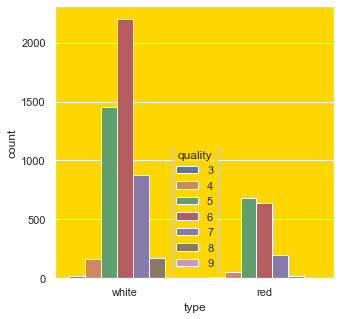

In [13]:
sns.set(rc={'axes.facecolor':'gold'})
plt.figure(figsize=(5,5))
sns.countplot(x='type',hue='quality',data=wine_data)
plt.show()

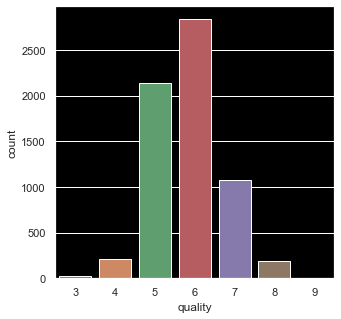

In [14]:
sns.set(rc={'axes.facecolor':'black'})
plt.figure(figsize=(5,5))
sns.countplot(x='quality',data=wine_data)
plt.show()

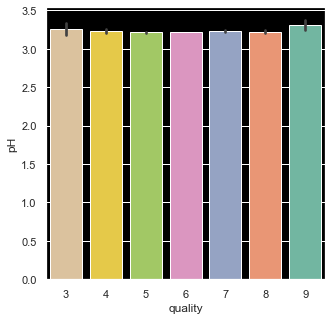

In [15]:
sns.set(rc={'axes.facecolor':'black'})
plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='pH',data=wine_data,palette='Set2_r')
plt.show()

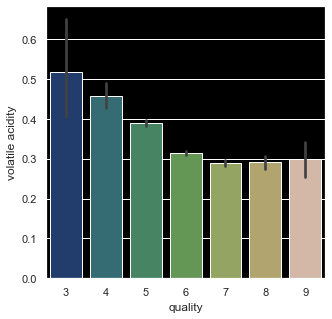

In [16]:
sns.set(rc={'axes.facecolor':'black'})
plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='volatile acidity',data=wine_data,palette='gist_earth')
plt.show()

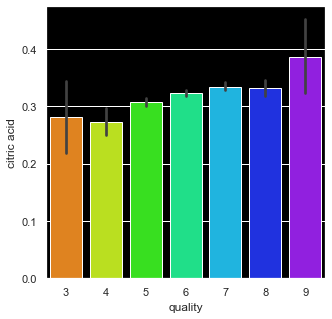

In [17]:
sns.set(rc={'axes.facecolor':'black'})
plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='citric acid',data=wine_data,palette='gist_rainbow')
plt.show()

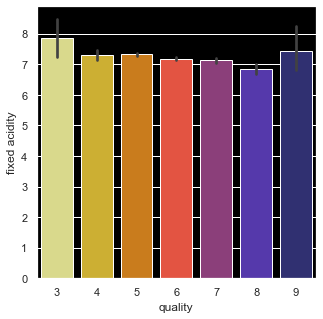

In [18]:
sns.set(rc={'axes.facecolor':'black'})
plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='fixed acidity',data=wine_data,palette='CMRmap_r')
plt.show()

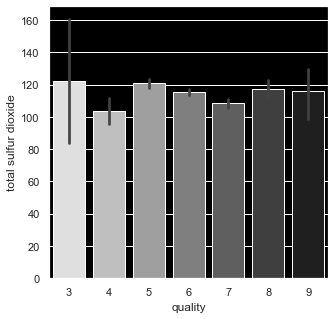

In [19]:
sns.set(rc={'axes.facecolor':'black'})
plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='total sulfur dioxide',data=wine_data,palette='gray_r')
plt.show()

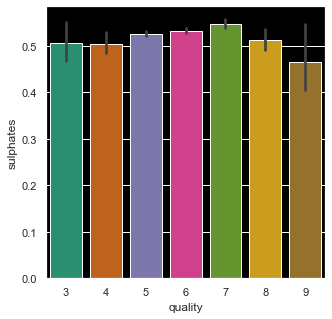

In [20]:
sns.set(rc={'axes.facecolor':'black'})
plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='sulphates',data=wine_data,palette='Dark2')
plt.show()

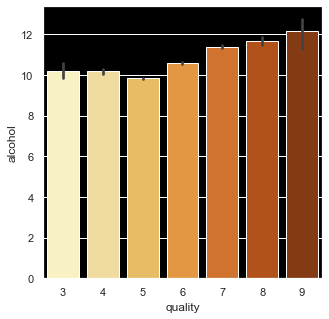

In [21]:
sns.set(rc={'axes.facecolor':'black'})
plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='alcohol',data=wine_data,palette='YlOrBr')
plt.show()

### Finding the correlation:

In [22]:
wine_data_corr = wine_data.corr()
wine_data_corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.220172,0.323736,-0.112319,0.298421,-0.283317,-0.329747,0.459204,-0.251814,0.300380,-0.095603,-0.077031
volatile acidity,0.220172,1.000000,-0.378061,-0.196702,0.377167,-0.353230,-0.414928,0.271193,0.260660,0.225476,-0.038248,-0.265953
citric acid,0.323736,-0.378061,1.000000,0.142486,0.039315,0.133437,0.195218,0.096320,-0.328689,0.057613,-0.010433,0.085706
residual sugar,-0.112319,-0.196702,0.142486,1.000000,-0.128902,0.403439,0.495820,0.552498,-0.267050,-0.185745,-0.359706,-0.036825
chlorides,0.298421,0.377167,0.039315,-0.128902,1.000000,-0.195042,-0.279580,0.362594,0.044806,0.395332,-0.256861,-0.200886
free sulfur dioxide,-0.283317,-0.353230,0.133437,0.403439,-0.195042,1.000000,0.720934,0.025717,-0.145191,-0.188489,-0.179838,0.055463
total sulfur dioxide,-0.329747,-0.414928,0.195218,0.495820,-0.279580,0.720934,1.000000,0.032395,-0.237687,-0.275381,-0.265740,-0.041385
density,0.459204,0.271193,0.096320,0.552498,0.362594,0.025717,0.032395,1.000000,0.011920,0.259454,-0.686745,-0.305858
pH,-0.251814,0.260660,-0.328689,-0.267050,0.044806,-0.145191,-0.237687,0.011920,1.000000,0.191248,0.121002,0.019366
sulphates,0.300380,0.225476,0.057613,-0.185745,0.395332,-0.188489,-0.275381,0.259454,0.191248,1.000000,-0.003261,0.038729


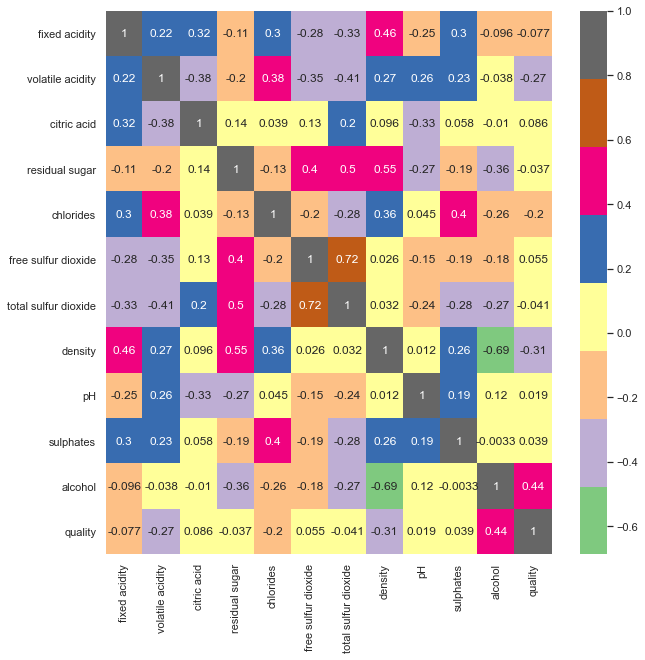

In [23]:
plt.figure(figsize=(10,10))
sns.heatmap(wine_data_corr,annot=True,cbar=True,cmap='Accent')
plt.show()

### Checking Null values

In [24]:
wine_data.isna().sum().sort_values(ascending=False)

fixed acidity           10
pH                       9
volatile acidity         8
sulphates                4
citric acid              3
residual sugar           2
chlorides                2
type                     0
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
alcohol                  0
quality                  0
dtype: int64

### Since, this dataset contains very less number of null values so we can drop them

In [25]:
wine_data.dropna(axis=0,inplace=True)

In [26]:
wine_data.isna().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### Label Encoding :
#### Label Encoding refers to converting the labels into a numeric form so as to convert them into the machine-readable form.Machine learning algorithms can then decide in a better way how those labels must be operated.It is an important pre-processing step for the structured dataset in supervised learning.


In [27]:
wine_data['type'] = LabelEncoder().fit_transform(wine_data['type'])

### Feature Selection (Using SelectKBest & chi2) and Model Building

In [28]:
X = wine_data.drop(['quality'],axis=1)
y = wine_data['quality']

### SelectKBest :
#### The SelectKBest method selects the features according to the k highest score. By changing the 'score_func' parameter we can apply the method for both classification and regression data. Selecting best features is important process when we prepare a large dataset for training.


In [29]:
kbest = SelectKBest(score_func=chi2,k=10)
features = kbest.fit(X,y)

In [30]:
features.scores_

array([2.88207701e+01, 1.10119432e+01, 4.25649834e+01, 3.63014905e+00,
       2.20115243e+02, 6.38601408e+00, 8.91417922e+02, 1.24013979e+03,
       6.52829647e-03, 9.50651980e-02, 1.06858035e+00, 2.00627560e+02])

In [31]:
scores = pd.DataFrame(features.scores_,columns=['Scores'])
col = pd.DataFrame(X.columns,columns=['Features'])

In [32]:
f = pd.concat([col,scores],axis=1)

In [33]:
f

,Features,Scores
0,type,28.820770
1,fixed acidity,11.011943
2,volatile acidity,42.564983
3,citric acid,3.630149
4,residual sugar,220.115243
5,chlorides,6.386014
6,free sulfur dioxide,891.417922
7,total sulfur dioxide,1240.139794
8,density,0.006528
9,pH,0.095065


In [34]:
imp_features = f.nlargest(9,'Scores')

In [35]:
imp_features

,Features,Scores
7,total sulfur dioxide,1240.139794
6,free sulfur dioxide,891.417922
4,residual sugar,220.115243
11,alcohol,200.627560
2,volatile acidity,42.564983
0,type,28.820770
1,fixed acidity,11.011943
5,chlorides,6.386014
3,citric acid,3.630149


### Important features are:
### 'total sulfur dioxide', 'free sulfur dioxide', 'residual sugar',alcohol', 'volatile acidity', 'type', 'fixed acidity','chlorides','citric acid'

In [36]:
wine = []
for col in imp_features.Features:
    wine.append(col)

In [37]:
wine = wine_data[wine]

In [38]:
wine

,total sulfur dioxide,free sulfur dioxide,residual sugar,alcohol,volatile acidity,type,fixed acidity,chlorides,citric acid
0,170.0,45.0,20.7,8.8,0.270,1,7.0,0.045,0.36
1,132.0,14.0,1.6,9.5,0.300,1,6.3,0.049,0.34
2,97.0,30.0,6.9,10.1,0.280,1,8.1,0.050,0.40
3,186.0,47.0,8.5,9.9,0.230,1,7.2,0.058,0.32
4,186.0,47.0,8.5,9.9,0.230,1,7.2,0.058,0.32
...,...,...,...,...,...,...,...,...,...
6491,38.0,28.0,1.9,9.5,0.620,0,6.8,0.068,0.08
6492,44.0,32.0,2.0,10.5,0.600,0,6.2,0.090,0.08
6494,40.0,29.0,2.3,11.0,0.510,0,6.3,0.076,0.13
6495,44.0,32.0,2.0,10.2,0.645,0,5.9,0.075,0.12


### If the quality is greater than or equal to 6 then the quality is good, otherwise bad.
### Here 1 means Good Quality
### 0 means Bad Quality


In [39]:
y = y.apply(lambda i: 1 if i>=6 else 0)

### Feature Scaling
### Normalizing the data

### why do we need Feature Scaling? 
#### 1.we need this technique for learning models that rely on metrics(like KNN). 
#### 2.different features scale cause different ratio in updating the values. we can compare features. increase the performance. Remember that: we have to scale the unseen data in the feauture. harder or different interpretability of feature coeff.

### Two techniques of scaling: 
#### Standardization: rescale data to have mean=0 and standard_deviation=1 
#### Normalization: all data values to be between 0-1.

### Note: we do not use scaling on labels


In [40]:
scaling = MinMaxScaler()

In [41]:
wine = scaling.fit_transform(wine)

In [42]:
wine = pd.DataFrame(wine)

In [43]:
wine.shape

(6463, 9)

In [44]:
wine.head()

,0,1,2,3,4,5,6,7,8
0,0.377880,0.152778,0.308282,0.115942,0.126667,1.0,0.264463,0.059801,0.216867
1,0.290323,0.045139,0.015337,0.217391,0.146667,1.0,0.206612,0.066445,0.204819
2,0.209677,0.100694,0.096626,0.304348,0.133333,1.0,0.355372,0.068106,0.240964
3,0.414747,0.159722,0.121166,0.275362,0.100000,1.0,0.280992,0.081395,0.192771
4,0.414747,0.159722,0.121166,0.275362,0.100000,1.0,0.280992,0.081395,0.192771


### Splitting the Data

In [45]:
X_train,X_test,y_train,y_test=train_test_split(wine,y,test_size=.20,random_state=0)

In [46]:
X_train.shape,y_train.shape

((5170, 9), (5170,))

In [47]:
X_test.shape,y_test.shape

((1293, 9), (1293,))

In [48]:
np.isnan(wine.sum().any())# Checking if is there are any null values or not

False

In [49]:
np.isfinite(wine.sum().all())# Checking if it is finite or not

True

### Logistic Regression

### Model Training

In [50]:
lr=LogisticRegression(max_iter=1000)

In [51]:
lrmodel = lr.fit(X_train,y_train)

### Model Testing & Model Evaluation
---
### Training Data

In [52]:
y_pred_train_lr = lrmodel.predict(X_train)
y_pred_train_lr

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

In [53]:
print('Accuracy Score           :', round(accuracy_score(y_train , y_pred_train_lr),2))
print('---------------------------')
print('Confusion Matrix         :\n', confusion_matrix(y_train , y_pred_train_lr))
print('---------------------------')
print('Classification Report    :\n',classification_report(y_train , y_pred_train_lr))

Accuracy Score           : 0.74
---------------------------
Confusion Matrix         :
 [[1085  825]
 [ 497 2763]]
---------------------------
Classification Report    :
               precision    recall  f1-score   support

           0       0.69      0.57      0.62      1910
           1       0.77      0.85      0.81      3260

    accuracy                           0.74      5170
   macro avg       0.73      0.71      0.71      5170
weighted avg       0.74      0.74      0.74      5170



### Testing Data

In [54]:
y_pred_test_lr = lrmodel.predict(X_test)
y_pred_test_lr

array([0, 1, 1, ..., 0, 1, 1], dtype=int64)

In [55]:
print('Accuracy Score:', round(accuracy_score(y_test , y_pred_test_lr),2))
print('---------------------------')
print('Confusion Matrix:\n', confusion_matrix(y_test , y_pred_test_lr))
print('---------------------------')
print('Classification Report:\n',classification_report(y_test , y_pred_test_lr))

Accuracy Score: 0.75
---------------------------
Confusion Matrix:
 [[263 199]
 [129 702]]
---------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.57      0.62       462
           1       0.78      0.84      0.81       831

    accuracy                           0.75      1293
   macro avg       0.73      0.71      0.71      1293
weighted avg       0.74      0.75      0.74      1293



### Random Forest Classifier

### Model Training

In [56]:
rf=RandomForestClassifier()

In [57]:
rfmodel=rf.fit(X_train,y_train)

### Model Testing & Model Evaluation
---
### Training Data

In [58]:
y_pred_train_rf = rfmodel.predict(X_train)
y_pred_train_rf

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

In [59]:
print('Accuracy Score           :', round(accuracy_score(y_train , y_pred_train_rf),2))
print('---------------------------')
print('Confusion Matrix         :\n', confusion_matrix(y_train , y_pred_train_rf))
print('---------------------------')
print('Classification Report    :\n',classification_report(y_train , y_pred_train_rf))

Accuracy Score           : 1.0
---------------------------
Confusion Matrix         :
 [[1910    0]
 [   0 3260]]
---------------------------
Classification Report    :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1910
           1       1.00      1.00      1.00      3260

    accuracy                           1.00      5170
   macro avg       1.00      1.00      1.00      5170
weighted avg       1.00      1.00      1.00      5170



### Testing Data

In [60]:
y_pred_test_rf = rfmodel.predict(X_test)
y_pred_test_rf

array([0, 1, 1, ..., 0, 1, 1], dtype=int64)

In [61]:
print('Accuracy Score:', round(accuracy_score(y_test , y_pred_test_rf),2))
print('---------------------------')
print('Confusion Matrix:\n', confusion_matrix(y_test , y_pred_test_rf))
print('---------------------------')
print('Classification Report:\n',classification_report(y_test , y_pred_test_rf))

Accuracy Score: 0.83
---------------------------
Confusion Matrix:
 [[353 109]
 [106 725]]
---------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.76      0.77       462
           1       0.87      0.87      0.87       831

    accuracy                           0.83      1293
   macro avg       0.82      0.82      0.82      1293
weighted avg       0.83      0.83      0.83      1293



### DecisionTreeClassifier


### Model Training

In [62]:
dt = DecisionTreeClassifier(criterion='gini',max_depth=10)

In [63]:
dtmodel=dt.fit(X_train,y_train)

### Model Testing & Model Evaluation
---
### Training Data

In [64]:
y_pred_train_dt = dtmodel.predict(X_train)
y_pred_train_dt

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

In [65]:
print('Accuracy Score           :', round(accuracy_score(y_train , y_pred_train_dt),2))
print('---------------------------')
print('Confusion Matrix         :\n', confusion_matrix(y_train , y_pred_train_dt))
print('---------------------------')
print('Classification Report    :\n',classification_report(y_train , y_pred_train_dt))

Accuracy Score           : 0.87
---------------------------
Confusion Matrix         :
 [[1587  323]
 [ 366 2894]]
---------------------------
Classification Report    :
               precision    recall  f1-score   support

           0       0.81      0.83      0.82      1910
           1       0.90      0.89      0.89      3260

    accuracy                           0.87      5170
   macro avg       0.86      0.86      0.86      5170
weighted avg       0.87      0.87      0.87      5170



### Testing Data

In [66]:
y_pred_test_dt = dtmodel.predict(X_test)
y_pred_test_dt

array([0, 1, 1, ..., 0, 1, 1], dtype=int64)

In [67]:
print('Accuracy Score:', round(accuracy_score(y_test , y_pred_test_dt),2))
print('---------------------------')
print('Confusion Matrix:\n', confusion_matrix(y_test , y_pred_test_dt))
print('---------------------------')
print('Classification Report:\n',classification_report(y_test , y_pred_test_dt))

Accuracy Score: 0.77
---------------------------
Confusion Matrix:
 [[331 131]
 [169 662]]
---------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.72      0.69       462
           1       0.83      0.80      0.82       831

    accuracy                           0.77      1293
   macro avg       0.75      0.76      0.75      1293
weighted avg       0.77      0.77      0.77      1293



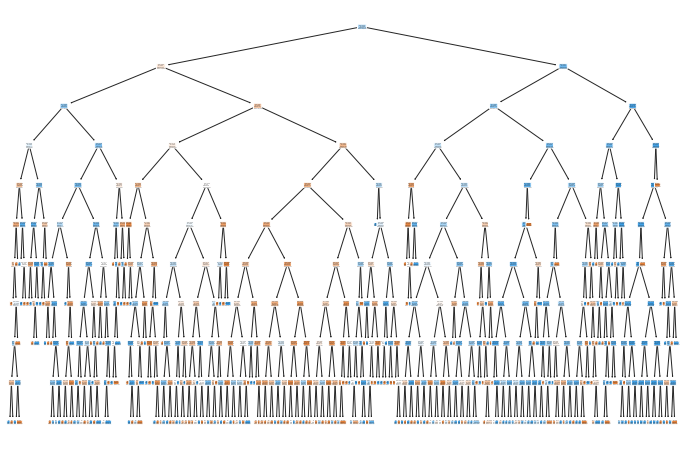

In [68]:
plt.figure(figsize=(12,8))
plot_tree(decision_tree = dtmodel , filled = True, rounded = True)
plt.show()

### XGBoost(XGBClassifier)
### Model Training

In [69]:
xgb=XGBClassifier(n_estimators=300,max_depth=4)

In [70]:
xgbmodel=xgb.fit(X_train,y_train)

[22:46:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


### Model Testing & Model Evaluation
---
### Training Data

In [71]:
y_pred_train_xgb = xgbmodel.predict(X_train)
y_pred_train_xgb

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

In [72]:
print('Accuracy Score           :', round(accuracy_score(y_train , y_pred_train_xgb),2))
print('---------------------------')
print('Confusion Matrix         :\n', confusion_matrix(y_train , y_pred_train_xgb))
print('---------------------------')
print('Classification Report    :\n',classification_report(y_train , y_pred_train_xgb))

Accuracy Score           : 0.97
---------------------------
Confusion Matrix         :
 [[1786  124]
 [  53 3207]]
---------------------------
Classification Report    :
               precision    recall  f1-score   support

           0       0.97      0.94      0.95      1910
           1       0.96      0.98      0.97      3260

    accuracy                           0.97      5170
   macro avg       0.97      0.96      0.96      5170
weighted avg       0.97      0.97      0.97      5170



### Testing Data

In [73]:
y_pred_test_xgb = xgbmodel.predict(X_test)
y_pred_test_xgb

array([0, 1, 1, ..., 0, 1, 1], dtype=int64)

In [74]:
print('Accuracy Score:', round(accuracy_score(y_test , y_pred_test_xgb),2))
print('---------------------------')
print('Confusion Matrix:\n', confusion_matrix(y_test , y_pred_test_xgb))
print('---------------------------')
print('Classification Report:\n',classification_report(y_test , y_pred_test_xgb))

Accuracy Score: 0.81
---------------------------
Confusion Matrix:
 [[335 127]
 [120 711]]
---------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.73      0.73       462
           1       0.85      0.86      0.85       831

    accuracy                           0.81      1293
   macro avg       0.79      0.79      0.79      1293
weighted avg       0.81      0.81      0.81      1293



### Gradient Boosting Classifier


### Model Training

In [75]:
gbm=GradientBoostingClassifier(n_estimators=700,max_depth=4,learning_rate=0.09)

In [76]:
gbmmodel=gbm.fit(X_train,y_train)

### Model Testing & Model Evaluation
---
### Training Data

In [77]:
y_pred_train_gbm = gbmmodel.predict(X_train)
y_pred_train_gbm

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

In [78]:
print('Accuracy Score           :', round(accuracy_score(y_train , y_pred_train_gbm),2))
print('---------------------------')
print('Confusion Matrix         :\n', confusion_matrix(y_train , y_pred_train_gbm))
print('---------------------------')
print('Classification Report    :\n',classification_report(y_train , y_pred_train_gbm))

Accuracy Score           : 0.96
---------------------------
Confusion Matrix         :
 [[1766  144]
 [  47 3213]]
---------------------------
Classification Report    :
               precision    recall  f1-score   support

           0       0.97      0.92      0.95      1910
           1       0.96      0.99      0.97      3260

    accuracy                           0.96      5170
   macro avg       0.97      0.96      0.96      5170
weighted avg       0.96      0.96      0.96      5170



### Testing Data

In [79]:
y_pred_test_gbm = gbmmodel.predict(X_test)
y_pred_test_gbm

array([0, 1, 1, ..., 0, 1, 1], dtype=int64)

In [80]:
print('Accuracy Score:', round(accuracy_score(y_test , y_pred_test_gbm),2))
print('---------------------------')
print('Confusion Matrix:\n', confusion_matrix(y_test , y_pred_test_gbm))
print('---------------------------')
print('Classification Report:\n',classification_report(y_test , y_pred_test_gbm))

Accuracy Score: 0.81
---------------------------
Confusion Matrix:
 [[339 123]
 [118 713]]
---------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.73      0.74       462
           1       0.85      0.86      0.86       831

    accuracy                           0.81      1293
   macro avg       0.80      0.80      0.80      1293
weighted avg       0.81      0.81      0.81      1293



### From above models, Random Forest Classifier gives the best accuracy, so we will find Hyper Parameter Tuning for Random Forest Classifier model using RandomizedSearchCV

In [81]:
from pprint import pprint as pp

In [82]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pp(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [83]:
# %%time
# Use the random grid to search for best hyperparameters
# First create the base model to tune
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
#rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=12121, n_jobs = -1)
# Fit the random search model
#rf_random.fit(X_train, y_train)

In [84]:
#rf_random.best_params_

### Model Training

In [85]:
rf_tune=RandomForestClassifier(n_estimators=1000,
 min_samples_split= 2,
 min_samples_leaf= 1,
 max_features= 'sqrt',
 max_depth= 20,
 bootstrap= True)

In [86]:
rf_tunemodel=rf_tune.fit(X_train,y_train)

### Model Testing & Model Evaluation
---
### Training Data

In [87]:
y_pred_train_rftune = rf_tunemodel.predict(X_train)
y_pred_train_rftune

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

In [88]:
print('Accuracy Score           :', round(accuracy_score(y_train , y_pred_train_rftune),2))
print('---------------------------')
print('Confusion Matrix         :\n', confusion_matrix(y_train , y_pred_train_rftune))
print('---------------------------')
print('Classification Report    :\n',classification_report(y_train , y_pred_train_rftune))

Accuracy Score           : 1.0
---------------------------
Confusion Matrix         :
 [[1910    0]
 [   0 3260]]
---------------------------
Classification Report    :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1910
           1       1.00      1.00      1.00      3260

    accuracy                           1.00      5170
   macro avg       1.00      1.00      1.00      5170
weighted avg       1.00      1.00      1.00      5170



### Testing Data

In [89]:
y_pred_test_rftune = rf_tunemodel.predict(X_test)
y_pred_test_rftune

array([0, 1, 1, ..., 0, 1, 1], dtype=int64)

In [90]:
print('Accuracy Score:', round(accuracy_score(y_test , y_pred_test_rftune),2))
print('---------------------------')
print('Confusion Matrix:\n', confusion_matrix(y_test , y_pred_test_rftune))
print('---------------------------')
print('Classification Report:\n',classification_report(y_test , y_pred_test_rftune))

Accuracy Score: 0.83
---------------------------
Confusion Matrix:
 [[348 114]
 [104 727]]
---------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.75      0.76       462
           1       0.86      0.87      0.87       831

    accuracy                           0.83      1293
   macro avg       0.82      0.81      0.82      1293
weighted avg       0.83      0.83      0.83      1293



### Model Comparison : 

In [91]:
models = [['Logistic Regression',(round(accuracy_score(y_train , y_pred_train_lr),2)),
          (round(accuracy_score(y_test , y_pred_test_lr),2))],
         ['Random Forest',(round(accuracy_score(y_train , y_pred_train_rftune),2)),
         (round(accuracy_score(y_test , y_pred_test_rftune),2))],
         ['Decision Tree',(round(accuracy_score(y_train , y_pred_train_dt),2)),
         (round(accuracy_score(y_test , y_pred_test_dt),2))],
         ['Gradient Boosting',(round(accuracy_score(y_train , y_pred_train_gbm),2)),
         (round(accuracy_score(y_test , y_pred_test_gbm),2))],
         ['XGBoost',(round(accuracy_score(y_train , y_pred_train_xgb),2)),
         (round(accuracy_score(y_test , y_pred_test_xgb),2))]]

In [92]:
Model_Comparision = pd.DataFrame(models,columns= ['Model Name', 'Accuracy(train)','Accuracy(test)'])

In [93]:
Model_Comparision

,Model Name,Accuracy(train),Accuracy(test)
0,Logistic Regression,0.74,0.75
1,Random Forest,1.00,0.83
2,Decision Tree,0.87,0.77
3,Gradient Boosting,0.96,0.81
4,XGBoost,0.97,0.81


### Conclusion: So, according to the analysis we can see that RandomForestClassifier gives best result. Hence, RandomForestClassifier is the best fit model.

In [94]:
wine_quality = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred_test_rftune})

In [95]:
wine_quality

,Actual,Predicted
3859,0,0
4675,1,1
513,1,1
5490,0,0
4329,0,0
...,...,...
410,1,1
4562,1,1
5626,0,0
1248,1,1
